<a href="https://colab.research.google.com/github/divyani95/Crypto/blob/main/Real_Time_Traffic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *

#for warning
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
#df_raw=pd.read_csv(r'C:\Users\nomaniqbal\Desktop\This Week\Metro_Interstate_Traffic_Volume\Metro_Interstate_Traffic_Volume.csv', parse_dates=['date_time'], index_col='date_time')
df_raw = pd.read_csv("/content/Metro_Interstate_Traffic_Volume.csv", parse_dates=['date_time'], index_col='date_time')
df_raw

FileNotFoundError: [Errno 2] No such file or directory: '/content/Metro_Interstate_Traffic_Volume.csv'

In [ ]:
df_raw.info()

NameError: name 'df_raw' is not defined

In [ ]:
import pandas as pd

def describe(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include='number')

    # Compute summary statistics and skewness
    return pd.concat([numeric_df.describe().T, numeric_df.skew().rename('skew')], axis=1)

describe(df_raw)

,count,mean,std,min,25%,50%,75%,max,skew
temp,48204.0,281.205870,13.338232,0.0,272.16,282.45,291.806,310.07,-2.247226
rain_1h,48204.0,0.334264,44.789133,0.0,0.00,0.00,0.000,9831.30,219.389036
snow_1h,48204.0,0.000222,0.008168,0.0,0.00,0.00,0.000,0.51,48.367484
clouds_all,48204.0,49.362231,39.015750,0.0,1.00,64.00,90.000,100.00,-0.197257
traffic_volume,48204.0,3259.818355,1986.860670,0.0,1193.00,3380.00,4933.000,7280.00,-0.089381


In [ ]:
df_raw.isna().sum()

,0
holiday,48143
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
traffic_volume,0


In [ ]:
plot_cols = ['temp', 'rain_1h', 'snow_1h', 'clouds_all','traffic_volume']

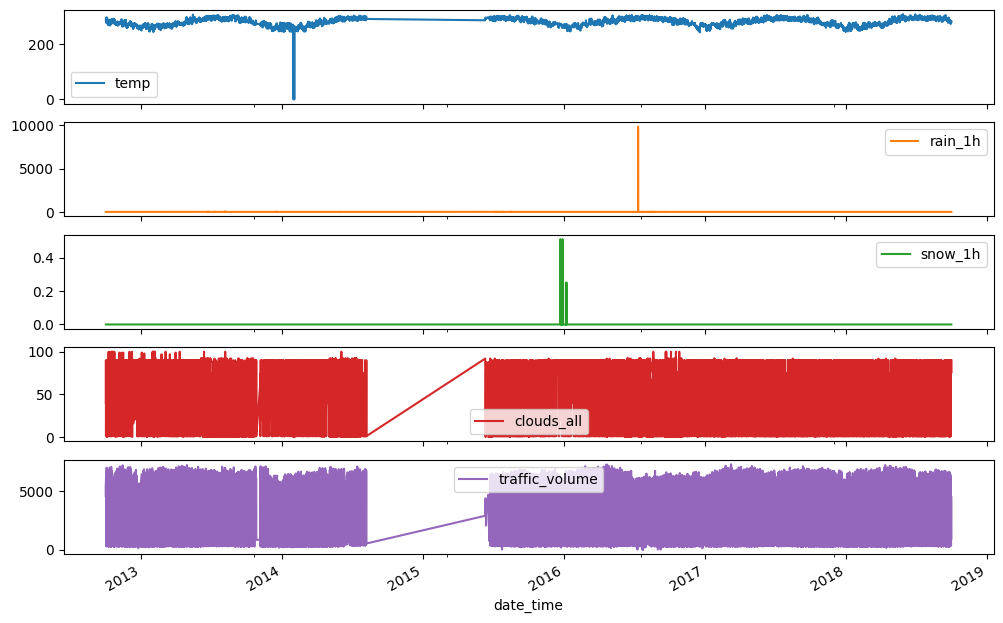

In [ ]:
plot_features = df_raw[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
date_time,,,,,
2013-10-01 21:00:00,285.52,0.00,0.0,0,2670
2013-10-01 23:00:00,282.93,0.00,0.0,0,1299
2013-10-02 23:00:00,286.63,2.37,0.0,88,899
2013-10-02 23:00:00,286.63,2.37,0.0,88,899
2013-10-02 23:00:00,286.63,2.37,0.0,88,899
...,...,...,...,...,...
2013-11-30 19:00:00,274.27,0.00,0.0,64,3532
2013-11-30 20:00:00,273.16,0.00,0.0,64,2896
2013-11-30 21:00:00,272.51,0.00,0.0,64,2603


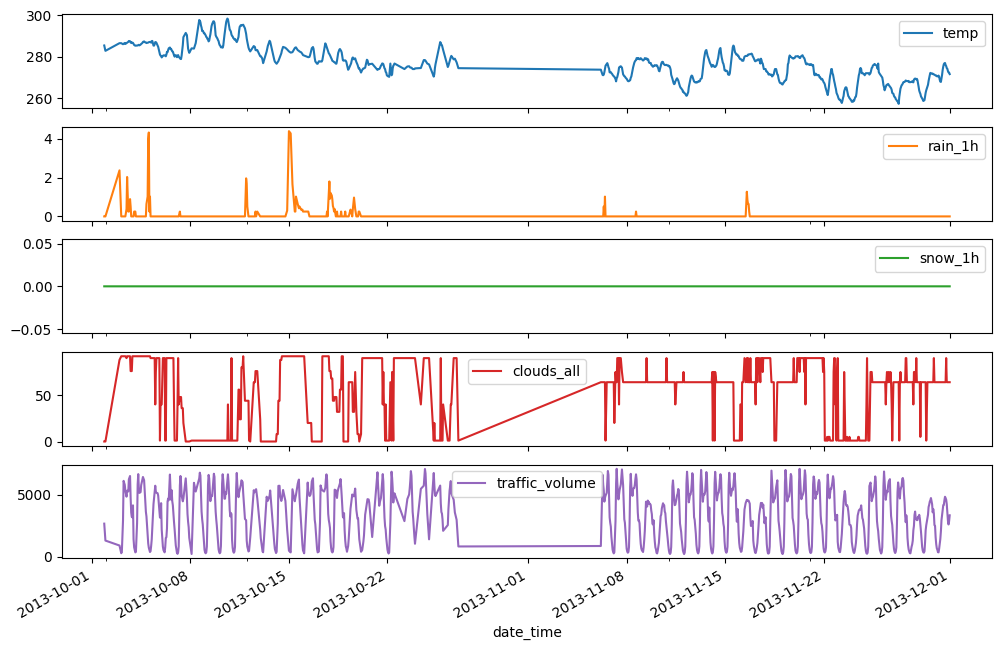

In [ ]:
plot_features = df_raw[plot_cols]['2013-10':'2013-11']
display(plot_features)
_ = plot_features.plot(subplots=True, figsize=(12,8))

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-08-08 00:00:00,NaN,293.450,0.0,0.0,40,Clouds,scattered clouds,848
2014-08-08 01:00:00,NaN,292.380,0.0,0.0,1,Clear,sky is clear,516
2015-06-11 20:00:00,NaN,287.586,0.0,0.0,92,Rain,light rain,2886


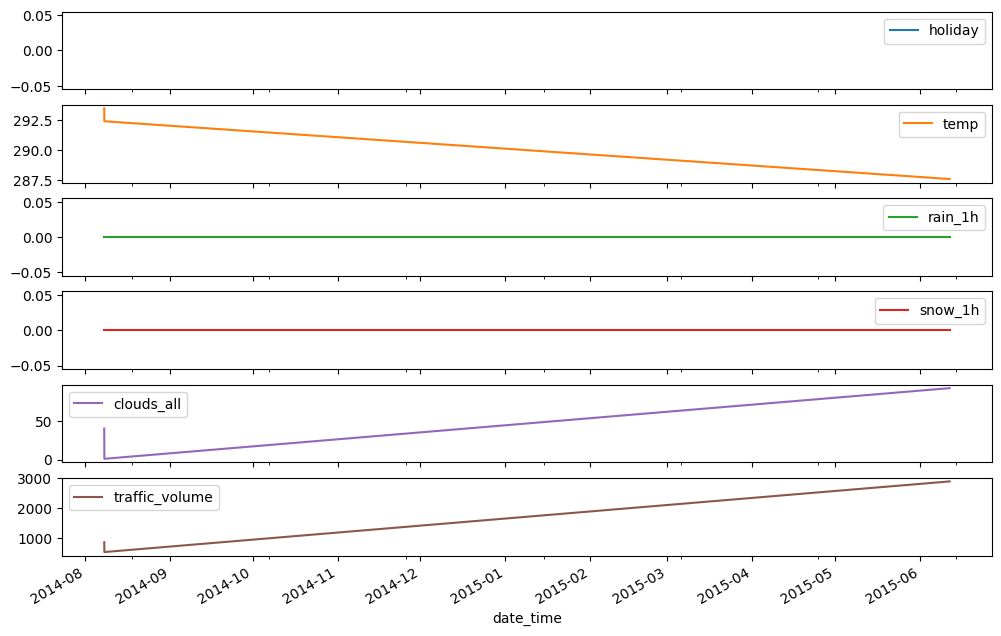

In [ ]:
plot_features = df_raw['2014-08-08':'2015-06-11']
display(plot_features)
_ = plot_features.plot(subplots=True, figsize=(12,8))

Inspect and cleanup

In [ ]:
# Exclude datetime columns
df_numeric = df_raw.select_dtypes(exclude=['datetime'])

# Compute summary statistics and transpose the result
df_numeric.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,48204.0,281.205870,13.338232,0.0,272.16,282.45,291.806,310.07
rain_1h,48204.0,0.334264,44.789133,0.0,0.00,0.00,0.000,9831.30
snow_1h,48204.0,0.000222,0.008168,0.0,0.00,0.00,0.000,0.51
clouds_all,48204.0,49.362231,39.015750,0.0,1.00,64.00,90.000,100.00
traffic_volume,48204.0,3259.818355,1986.860670,0.0,1193.00,3380.00,4933.000,7280.00


In [ ]:
df_raw.describe(include='object').transpose()

,count,unique,top,freq
holiday,61,11,Labor Day,7
weather_main,48204,11,Clouds,15164
weather_description,48204,38,sky is clear,11665


Univariate Analysis

In [ ]:
# Check if there are duplicate columns
duplicate_columns = df_raw.columns[df_raw.columns.duplicated()]
print("Duplicate columns:", duplicate_columns)

Duplicate columns: Index([], dtype='object')


In [ ]:
# Check for duplicate rows
duplicate_rows = df_raw[df_raw.index.duplicated()]
print("Duplicate rows:", duplicate_rows)

Duplicate rows:                     holiday    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                           
2012-10-10 07:00:00     NaN  281.25      0.0      0.0          99   
2012-10-10 08:00:00     NaN  280.10      0.0      0.0          99   
2012-10-10 09:00:00     NaN  279.61      0.0      0.0          99   
2012-10-14 09:00:00     NaN  282.43      0.0      0.0          57   
2012-10-14 09:00:00     NaN  282.43      0.0      0.0          57   
...                     ...     ...      ...      ...         ...   
2018-09-25 16:00:00     NaN  284.25      0.0      0.0          90   
2018-09-27 07:00:00     NaN  285.17      0.0      0.0          90   
2018-09-29 19:00:00     NaN  280.68      0.0      0.0          90   
2018-09-30 14:00:00     NaN  283.48      0.0      0.0          90   
2018-09-30 15:00:00     NaN  283.84      0.0      0.0          75   

                    weather_main      weather_description  traffic_volume  
date_time 

In [ ]:
# Remove duplicate rows
df_raw = df_raw[~df_raw.index.duplicated(keep='first')]

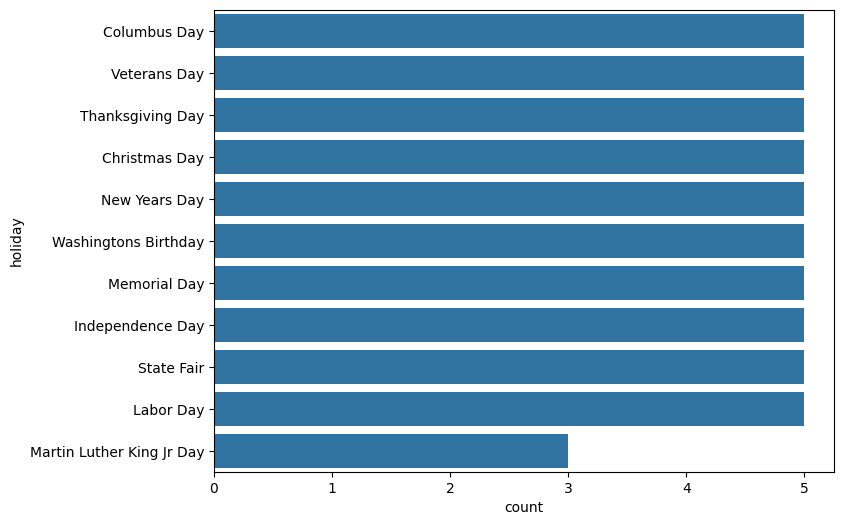

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting frequency of each category in holiday column
plt.figure(figsize=(8,6))
sns.countplot(y='holiday', data=df_raw)
plt.show()

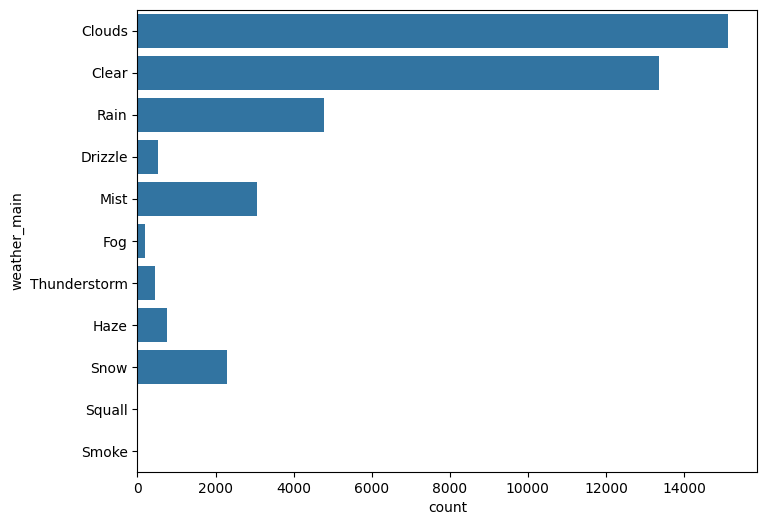

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(y='weather_main', data = df_raw)
plt.show()

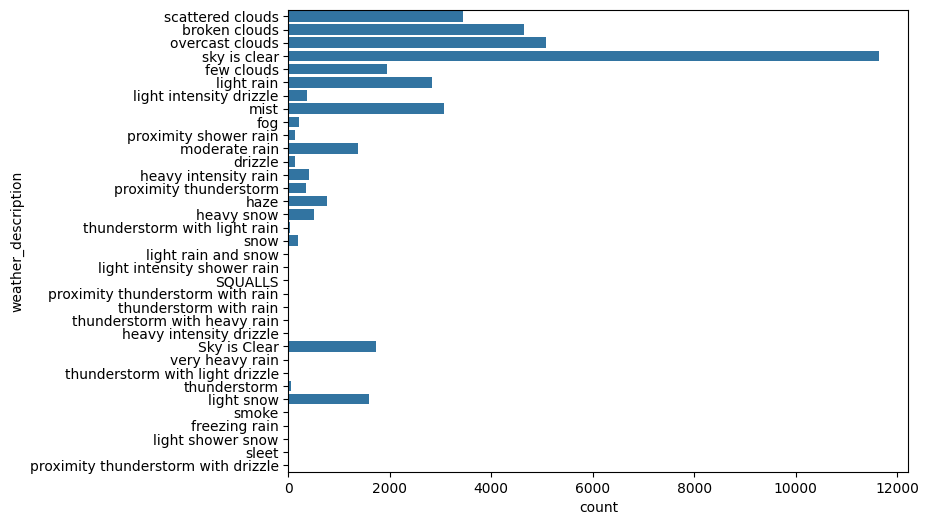

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(y='weather_description', data = df_raw)
plt.show()

checking outliers

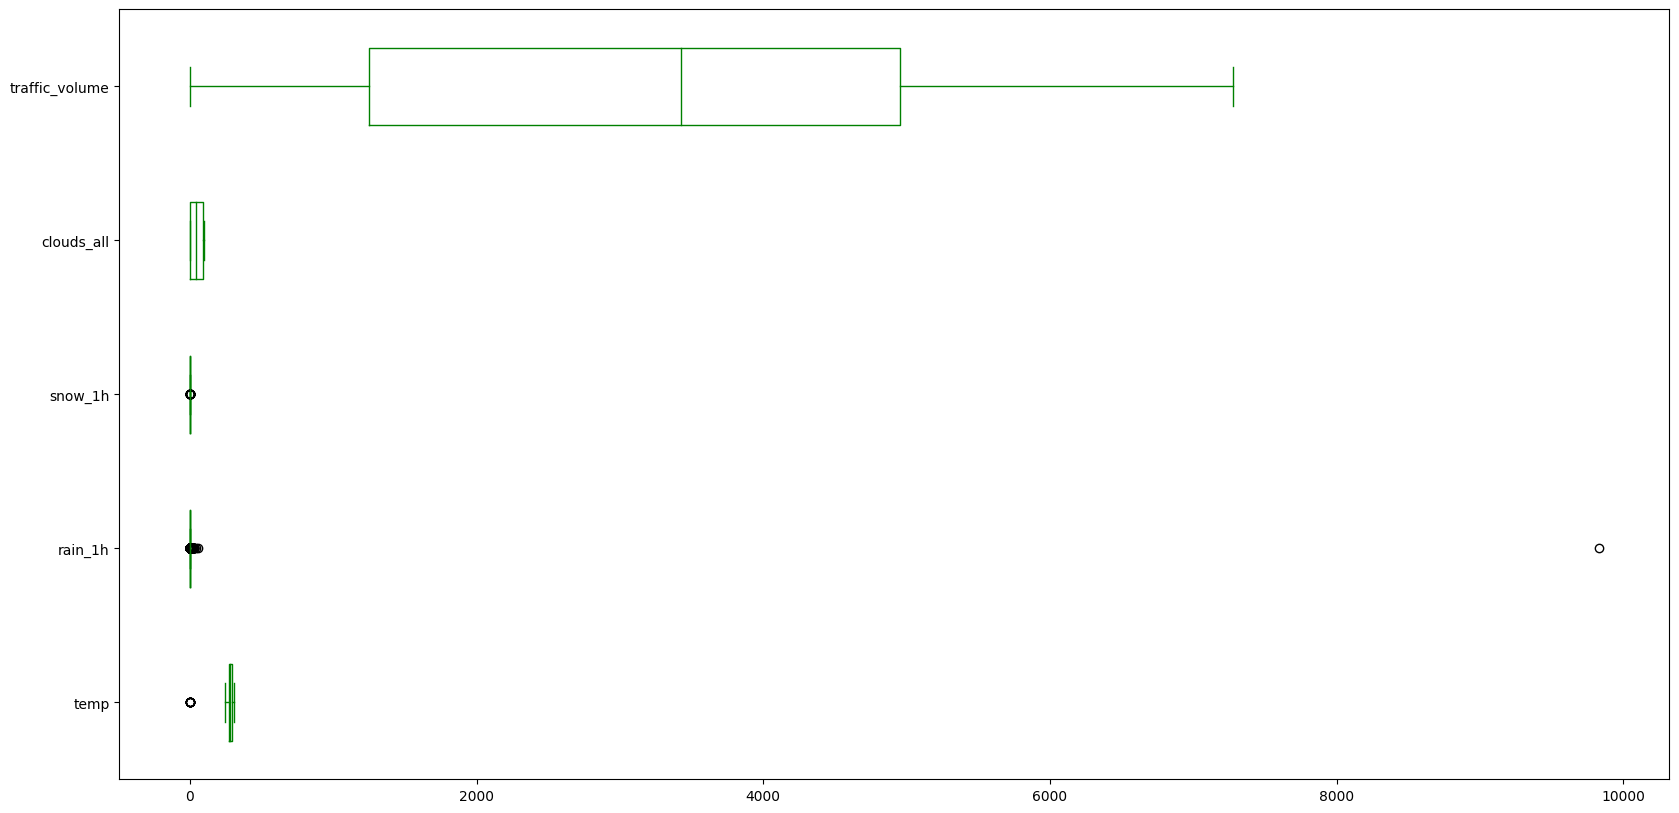

In [ ]:
df_raw.plot(kind='box',figsize=(20,10),color='Green',vert=False)
plt.show()

Temperature
Temerature values of 0 seem to be erronoes so we will replace with the mean value of the day. We observe 2 days having erronous values [2014-01-31, 2014-02-02]

In [ ]:
df_raw[df_raw.temp == 0]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 03:00:00,NaN,0.0,0.0,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,NaN,0.0,0.0,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,NaN,0.0,0.0,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,NaN,0.0,0.0,0.0,0,Clear,sky is clear,5150
2014-02-02 03:00:00,NaN,0.0,0.0,0.0,0,Clear,sky is clear,291
2014-02-02 04:00:00,NaN,0.0,0.0,0.0,0,Clear,sky is clear,284
2014-02-02 05:00:00,NaN,0.0,0.0,0.0,0,Clear,sky is clear,434
2014-02-02 06:00:00,NaN,0.0,0.0,0.0,0,Clear,sky is clear,739
2014-02-02 07:00:00,NaN,0.0,0.0,0.0,0,Clear,sky is clear,962


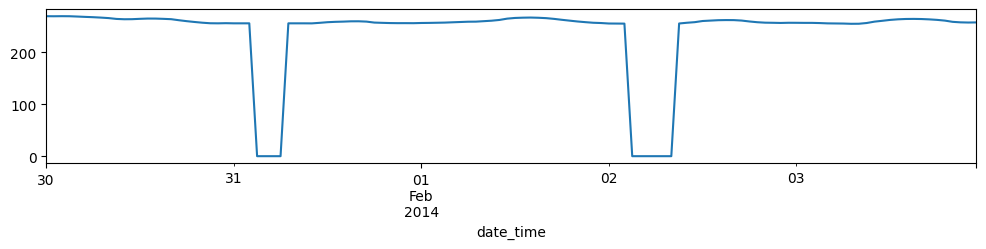

In [ ]:
plot_features = df_raw['temp']['2014-01-30':'2014-02-03']
_ = plot_features.plot(figsize=(12,2))

In [ ]:
print(df_raw.columns)

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'traffic_volume'],
      dtype='object')


In [ ]:
df_raw.index = pd.to_datetime(df_raw.index)

In [ ]:
df_raw.loc['2014-01-31']  # or df_raw.loc[pd.Timestamp('2014-01-31')]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 00:00:00,NaN,255.93,0.00,0.0,0,Clear,sky is clear,644
2014-01-31 01:00:00,NaN,255.93,0.00,0.0,0,Clear,sky is clear,390
2014-01-31 02:00:00,NaN,255.93,0.00,0.0,0,Clear,sky is clear,313
2014-01-31 03:00:00,NaN,0.00,0.00,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,NaN,0.00,0.00,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,NaN,0.00,0.00,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,NaN,0.00,0.00,0.0,0,Clear,sky is clear,5150
2014-01-31 07:00:00,NaN,255.93,0.00,0.0,0,Clear,sky is clear,5363
2014-01-31 08:00:00,NaN,255.93,0.00,0.0,0,Clear,sky is clear,5269


In [ ]:
day_1 = df_raw.index.date == datetime.date(2014, 1, 31)
day_2 = df_raw.index.date == datetime.date(2014, 2, 2)
bad_temps = df_raw['temp'] == 0

df_1 = df_raw.copy()
# Set the zeros to NaN to be excluded from the mean
df_1.loc[bad_temps,'temp'] = np.nan
df_1[bad_temps]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 03:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,5150
2014-02-02 03:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,291
2014-02-02 04:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,284
2014-02-02 05:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,434
2014-02-02 06:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,739
2014-02-02 07:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,962


In [ ]:
# The means to be used for each day
print(df_1[day_1].temp.mean())
print(df_1[day_2].temp.mean())

257.14
258.4327777777778


In [ ]:
df_1[bad_temps & day_1]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 03:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,5150


In [ ]:
df_1[bad_temps & day_2]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-02-02 03:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,291
2014-02-02 04:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,284
2014-02-02 05:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,434
2014-02-02 06:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,739
2014-02-02 07:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,962
2014-02-02 08:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,1670


Set the bad temp values to the mean of the day that it occured on

In [ ]:
# Set day 1 values
df_1.loc[bad_temps & day_1, 'temp'] = df_1[day_1].temp.mean()
df_1.loc[bad_temps & day_1]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 03:00:00,NaN,257.14,0.0,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,NaN,257.14,0.0,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,NaN,257.14,0.0,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,NaN,257.14,0.0,0.0,0,Clear,sky is clear,5150


In [ ]:
# Set day 1 values
df_1.loc[bad_temps & day_1, 'temp'] = df_1[day_1].temp.mean()
df_1.loc[bad_temps & day_1]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 03:00:00,NaN,257.14,0.0,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,NaN,257.14,0.0,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,NaN,257.14,0.0,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,NaN,257.14,0.0,0.0,0,Clear,sky is clear,5150


In [ ]:
df_1.loc[day_1 | day_2] # Check both days after assigning the mean

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 00:00:00,NaN,255.93,0.00,0.0,0,Clear,sky is clear,644
2014-01-31 01:00:00,NaN,255.93,0.00,0.0,0,Clear,sky is clear,390
2014-01-31 02:00:00,NaN,255.93,0.00,0.0,0,Clear,sky is clear,313
2014-01-31 03:00:00,NaN,257.14,0.00,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,NaN,257.14,0.00,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,NaN,257.14,0.00,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,NaN,257.14,0.00,0.0,0,Clear,sky is clear,5150
2014-01-31 07:00:00,NaN,255.93,0.00,0.0,0,Clear,sky is clear,5363
2014-01-31 08:00:00,NaN,255.93,0.00,0.0,0,Clear,sky is clear,5269


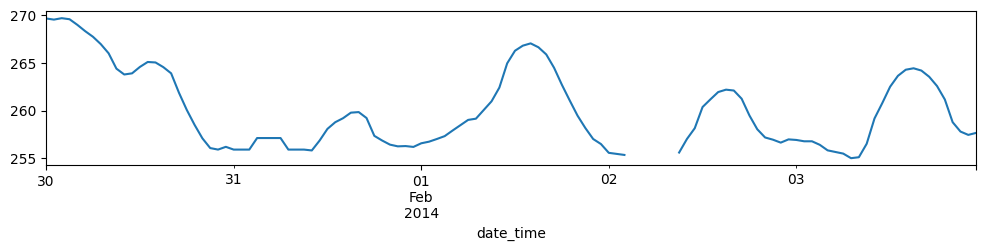

In [ ]:
plot_features = df_1['temp']['2014-01-30':'2014-02-03']
_ = plot_features.plot(figsize=(12,2))

Rain
Rain seems to have only 1 record with extreme value, I'll just set to the general mean value of rain.

In [ ]:
df_1[df_1.rain_1h > 100]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2016-07-11 17:00:00,NaN,302.11,9831.3,0.0,75,Rain,very heavy rain,5535


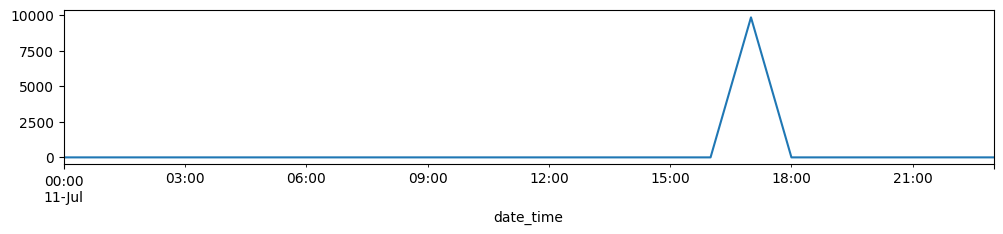

In [ ]:
plot_features = df_1.loc['2016-07-11', 'rain_1h']
_ = plot_features.plot(figsize=(12, 2))

In [ ]:
f_2 = df_1.copy()
f_2.loc['2016-07-11 17:00:00', 'rain_1h'] = np.nan
f_2.loc['2016-07-11 17:00:00', 'rain_1h'] = f_2['rain_1h'].mean()

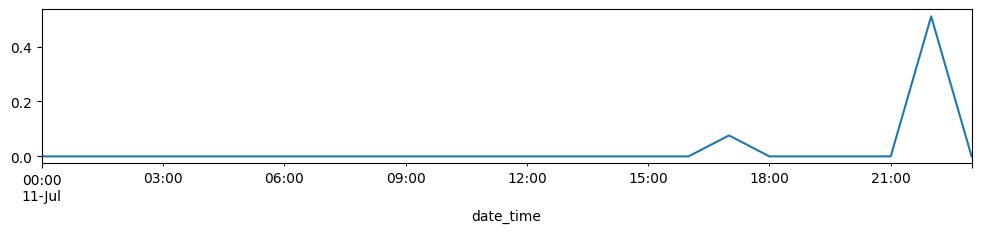

In [ ]:
plot_features = f_2.loc['2016-07-11', 'rain_1h']
_ = plot_features.plot(figsize=(12, 2))

Snow
I cannot determine if the snow has outliers or not, it seems to be an exceptional winter. I'll keep as is.

In [ ]:
f_2[(f_2.snow_1h > 0.2)]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2015-12-23 12:00:00,NaN,274.33,0.98,0.51,90,Rain,moderate rain,5167
2015-12-23 14:00:00,NaN,273.74,0.00,0.32,90,Snow,light snow,5182
2015-12-23 16:00:00,NaN,273.86,0.00,0.32,90,Snow,light snow,5222
2015-12-26 09:00:00,NaN,271.17,0.00,0.21,90,Snow,light snow,2013
2015-12-28 21:00:00,NaN,267.25,0.00,0.25,90,Snow,snow,2149
2015-12-28 22:00:00,NaN,267.14,0.00,0.44,90,Snow,snow,2165
2015-12-28 23:00:00,NaN,267.06,0.00,0.51,90,Snow,snow,888
2016-01-06 21:00:00,NaN,272.47,0.00,0.25,90,Snow,light snow,2077
2016-01-08 13:00:00,NaN,273.80,0.00,0.25,90,Snow,light snow,4933


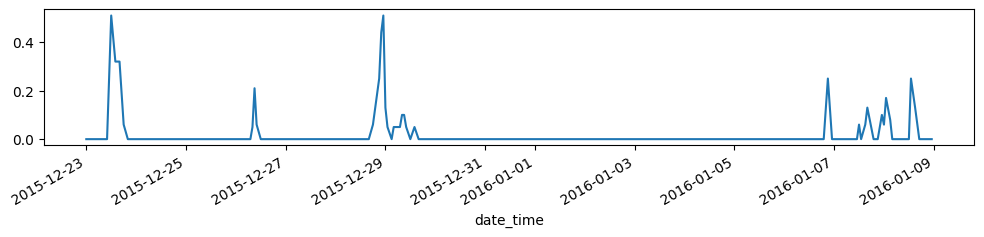

In [ ]:
plot_features = f_2['2015-12-23':'2016-01-08'].snow_1h
_ = plot_features.plot(figsize=(12,2))

Cleaned Data Overview
The data overview looks better now, but still I'm concerned with the missing data block between years 2014 and 2015.

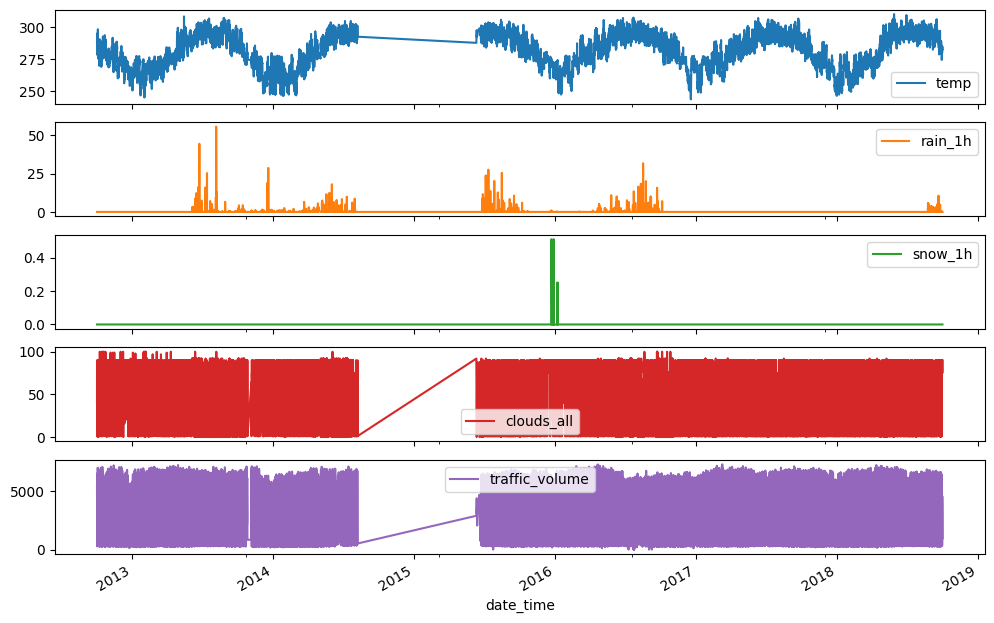

In [ ]:
plot_features = f_2[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

Feature engineering
Weather_main and Weather description

I decided to transform the weather_main into one-hot encoded variables, and to drop the weather_description as I see that it adds kind of redundant information with weather_main.

In [ ]:
df_3 = f_2.copy()
df_3.drop(columns=['weather_description'], inplace=True)
df_3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40575 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         53 non-null     object 
 1   temp            40569 non-null  float64
 2   rain_1h         40575 non-null  float64
 3   snow_1h         40575 non-null  float64
 4   clouds_all      40575 non-null  int64  
 5   weather_main    40575 non-null  object 
 6   traffic_volume  40575 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 3.5+ MB


In [ ]:
print(df_3.columns)

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume',
       'weather_Clear', 'weather_Clouds', 'weather_Drizzle', 'weather_Fog',
       'weather_Haze', 'weather_Mist', 'weather_Rain', 'weather_Smoke',
       'weather_Snow', 'weather_Squall', 'weather_Thunderstorm'],
      dtype='object')


In [ ]:
if 'weather_main' in df_3.columns:
    df_3 = pd.get_dummies(df_3, columns=['weather_main'], prefix='weather')
else:
    print("Column 'weather_main' not found in df_3")

Column 'weather_main' not found in df_3


In [ ]:
df_3.rename(columns=lambda x: x.strip().lower(), inplace=True)  # Normalizes column names
if 'weather_main' in df_3.columns:
    df_3 = pd.get_dummies(df_3, columns=['weather_main'], prefix='weather')
else:
    print("Column 'weather_main' not found in df_3 after normalization")

Column 'weather_main' not found in df_3 after normalization


In [ ]:
df_4 = df_3.copy()
df_4['is_holiday'] = df_4.pop('holiday').apply(lambda x: 1 if x != 'None' else 0)
df_4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40575 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temp                  40569 non-null  float64
 1   rain_1h               40575 non-null  float64
 2   snow_1h               40575 non-null  float64
 3   clouds_all            40575 non-null  int64  
 4   traffic_volume        40575 non-null  int64  
 5   weather_clear         40575 non-null  bool   
 6   weather_clouds        40575 non-null  bool   
 7   weather_drizzle       40575 non-null  bool   
 8   weather_fog           40575 non-null  bool   
 9   weather_haze          40575 non-null  bool   
 10  weather_mist          40575 non-null  bool   
 11  weather_rain          40575 non-null  bool   
 12  weather_smoke         40575 non-null  bool   
 13  weather_snow          40575 non-null  bool   
 14  weather_squall        40575 non-nul

In [ ]:
# Check sample values that are expected NOT TO BE a holiday
df_4[df_4.is_holiday == 0].head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_clear,weather_clouds,weather_drizzle,weather_fog,weather_haze,weather_mist,weather_rain,weather_smoke,weather_snow,weather_squall,weather_thunderstorm,is_holiday
date_time,,,,,,,,,,,,,,,,,


In [ ]:
# Check sample values that are expected TO BE a holiday
df_4[df_4.is_holiday == 1].head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_clear,weather_clouds,weather_drizzle,weather_fog,weather_haze,weather_mist,weather_rain,weather_smoke,weather_snow,weather_squall,weather_thunderstorm,is_holiday
date_time,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,288.28,0.0,0.0,40,5545,False,True,False,False,False,False,False,False,False,False,False,1
2012-10-02 10:00:00,289.36,0.0,0.0,75,4516,False,True,False,False,False,False,False,False,False,False,False,1
2012-10-02 11:00:00,289.58,0.0,0.0,90,4767,False,True,False,False,False,False,False,False,False,False,False,1
2012-10-02 12:00:00,290.13,0.0,0.0,90,5026,False,True,False,False,False,False,False,False,False,False,False,1
2012-10-02 13:00:00,291.14,0.0,0.0,75,4918,False,True,False,False,False,False,False,False,False,False,False,1


In [ ]:
df_4.index.day_name().map(lambda x: 1 if x in ['Saturday','Sunday'] else 0)

Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       ...
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype='int64', name='date_time', length=40575)

In [ ]:
df_4['is_weekend'] = df_4.index.day_name().map(lambda x: 1 if x in ['Saturday','Sunday'] else 0)
df_4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40575 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temp                  40569 non-null  float64
 1   rain_1h               40575 non-null  float64
 2   snow_1h               40575 non-null  float64
 3   clouds_all            40575 non-null  int64  
 4   traffic_volume        40575 non-null  int64  
 5   weather_clear         40575 non-null  bool   
 6   weather_clouds        40575 non-null  bool   
 7   weather_drizzle       40575 non-null  bool   
 8   weather_fog           40575 non-null  bool   
 9   weather_haze          40575 non-null  bool   
 10  weather_mist          40575 non-null  bool   
 11  weather_rain          40575 non-null  bool   
 12  weather_smoke         40575 non-null  bool   
 13  weather_snow          40575 non-null  bool   
 14  weather_squall        40575 non-nul

In [ ]:
# Check sample values that are expected NOT TO BE a weekend
df_4[df_4.is_weekend == 0].index.day_name()

Index(['Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       ...
       'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday',
       'Friday', 'Friday', 'Friday'],
      dtype='object', name='date_time', length=28979)

In [ ]:
# Check sample values that are expected TO BE a weekend
df_4[df_4.is_weekend == 1].index.day_name()

Index(['Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday',
       'Saturday', 'Saturday', 'Saturday', 'Saturday',
       ...
       'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'],
      dtype='object', name='date_time', length=11596)

Time
Similarly the Date Time column is very useful, but not in this form. We converting it to seconds:

In [ ]:
timestamp_s = df_4.index.map(datetime.datetime.timestamp)

My assumption is that the traffic flow is seasonal and periodic based on daily and yearly periodicity.

A simple approach to convert it to a usable signal is to use sin and cos to convert the time to clear "Time of day" and "Time of year" signals:

In [ ]:
day = 24*60*60
year = (365.2425)*day

df_4['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df_4['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df_4['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df_4['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

df_4

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_clear,weather_clouds,weather_drizzle,weather_fog,weather_haze,...,weather_smoke,weather_snow,weather_squall,weather_thunderstorm,is_holiday,is_weekend,Day sin,Day cos,Year sin,Year cos
date_time,,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,288.28,0.0,0.0,40,5545,False,True,False,False,False,...,False,False,False,False,1,0,7.071068e-01,-0.707107,-0.999766,0.021642
2012-10-02 10:00:00,289.36,0.0,0.0,75,4516,False,True,False,False,False,...,False,False,False,False,1,0,5.000000e-01,-0.866025,-0.999750,0.022358
2012-10-02 11:00:00,289.58,0.0,0.0,90,4767,False,True,False,False,False,...,False,False,False,False,1,0,2.588190e-01,-0.965926,-0.999734,0.023075
2012-10-02 12:00:00,290.13,0.0,0.0,90,5026,False,True,False,False,False,...,False,False,False,False,1,0,1.143105e-11,-1.000000,-0.999717,0.023791
2012-10-02 13:00:00,291.14,0.0,0.0,75,4918,False,True,False,False,False,...,False,False,False,False,1,0,-2.588190e-01,-0.965926,-0.999700,0.024508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,283.45,0.0,0.0,75,3543,False,True,False,False,False,...,False,False,False,False,1,1,-9.659258e-01,0.258819,-0.999910,-0.013421
2018-09-30 20:00:00,282.76,0.0,0.0,90,2781,False,True,False,False,False,...,False,False,False,False,1,1,-8.660254e-01,0.500000,-0.999919,-0.012705
2018-09-30 21:00:00,282.73,0.0,0.0,90,2159,False,False,False,False,False,...,False,False,False,True,1,1,-7.071068e-01,0.707107,-0.999928,-0.011988


Text(0.5, 1.0, 'Time of day signal')

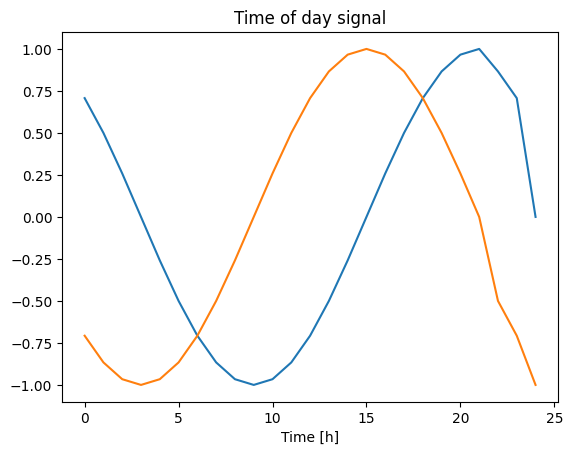

In [ ]:
plt.plot(np.array(df_4['Day sin'])[:25])
plt.plot(np.array(df_4['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

This gives the model access to the most important frequency features. In this case you knew ahead of time which frequencies were important.

If you didn't know, you can determine which frequencies are important using an fft. To check our assumptions, here is the tf.signal.rfft of the traffic_volume over time. Note the obvious peaks at frequencies near 1/year and 1/day:

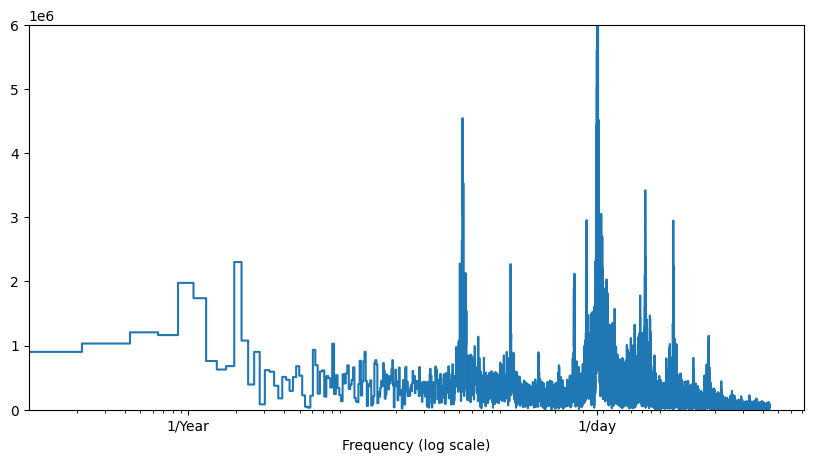

In [ ]:
fft = tf.signal.rfft(df_4['traffic_volume'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df_4['traffic_volume'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.figure(figsize=(10, 5))
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 6e6)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

Let's also break down the date_time components into other fields.

In [ ]:
df_4['dayofweek'] = df_4.index.dayofweek
df_4['day'] = df_4.index.day
df_4['month'] = df_4.index.month
df_4['year'] = df_4.index.year
df_4['day_hour'] = df_4.index.hour

Reorder dataframe columns

In [ ]:
df_5 = df_4.copy()

Set the traffic_volume to be the first column for ease of use later when we perform predictions

In [ ]:
df_5.insert(0, 'traffic_volume', df_5.pop('traffic_volume'))
df_5.insert(1, 'Day sin', df_5.pop('Day sin'))
df_5.insert(2, 'Day cos', df_5.pop('Day cos'))
df_5.insert(3, 'Year sin', df_5.pop('Year sin'))
df_5.insert(4, 'Year cos', df_5.pop('Year cos'))
df_5.insert(5, 'temp', df_5.pop('temp'))
df_5.insert(6, 'clouds_all', df_5.pop('clouds_all'))
df_5.insert(7, 'rain_1h', df_5.pop('rain_1h'))
df_5.insert(8, 'snow_1h', df_5.pop('snow_1h'))
df_5.insert(9, 'is_weekend', df_5.pop('is_weekend'))
df_5.insert(10, 'is_holiday', df_5.pop('is_holiday'))

Save clean data

In [ ]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40575 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   traffic_volume        40575 non-null  int64  
 1   Day sin               40575 non-null  float64
 2   Day cos               40575 non-null  float64
 3   Year sin              40575 non-null  float64
 4   Year cos              40575 non-null  float64
 5   temp                  40569 non-null  float64
 6   clouds_all            40575 non-null  int64  
 7   rain_1h               40575 non-null  float64
 8   snow_1h               40575 non-null  float64
 9   is_weekend            40575 non-null  int64  
 10  is_holiday            40575 non-null  int64  
 11  weather_clear         40575 non-null  bool   
 12  weather_clouds        40575 non-null  bool   
 13  weather_drizzle       40575 non-null  bool   
 14  weather_fog           40575 non-nul

In [ ]:
df_5.to_csv('C:\\Users\\nomaniqbal\\Desktop\\This Week\\Metro_Interstate_Traffic_Volume\\metro_interstate_clean.zip',
          compression=dict(method='zip', archive_name='C:\\Users\\nomaniqbal\\Desktop\\This Week\\Metro_Interstate_Traffic_Volume\metro_interstate_clean.csv'),
          index=True)

Prepare for timeseries data processing
Load clean data

In [ ]:
df_clean = pd.read_csv(r'C:\Users\nomaniqbal\Desktop\This Week\Metro_Interstate_Traffic_Volume\metro_interstate_clean.zip', parse_dates=['date_time'], index_col='date_time')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40575 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   traffic_volume        40575 non-null  int64  
 1   Day sin               40575 non-null  float64
 2   Day cos               40575 non-null  float64
 3   Year sin              40575 non-null  float64
 4   Year cos              40575 non-null  float64
 5   temp                  40569 non-null  float64
 6   clouds_all            40575 non-null  int64  
 7   rain_1h               40575 non-null  float64
 8   snow_1h               40575 non-null  float64
 9   is_weekend            40575 non-null  int64  
 10  is_holiday            40575 non-null  int64  
 11  weather_clear         40575 non-null  bool   
 12  weather_clouds        40575 non-null  bool   
 13  weather_drizzle       40575 non-null  bool   
 14  weather_fog           40575 non-nul

In [ ]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
traffic_volume,40575.0,3290.650474,1984.772909,0.00,1248.500000,3.427000e+03,4952.000000,7280.00
Day sin,40575.0,-0.001680,0.705984,-1.00,-0.707107,-3.043547e-13,0.707107,1.00
Day cos,40575.0,0.005320,0.708223,-1.00,-0.707107,5.802386e-13,0.707107,1.00
Year sin,40575.0,0.008868,0.697617,-1.00,-0.666517,-1.114574e-02,0.704264,1.00
Year cos,40575.0,-0.041783,0.715214,-1.00,-0.761371,-9.070939e-02,0.688574,1.00
temp,40569.0,281.383722,13.094753,243.39,271.840000,2.828650e+02,292.280000,310.07
clouds_all,40575.0,44.199162,38.683447,0.00,1.000000,4.000000e+01,90.000000,100.00
rain_1h,40575.0,0.076334,0.769626,0.00,0.000000,0.000000e+00,0.000000,55.63
snow_1h,40575.0,0.000117,0.005676,0.00,0.000000,0.000000e+00,0.000000,0.51
is_weekend,40575.0,0.285792,0.451796,0.00,0.000000,0.000000e+00,1.000000,1.00


Let's check for duplicate hourly entries, these are records having the same date_hour, which is not right as per the expectation of hourly samples.

In [ ]:
df_clean.index.duplicated().sum()

0

Split the data
The data will not be randomly shuffled before splitting. This is for two reasons.

It ensures that chopping the data into windows of consecutive samples is still possible.
It ensures that the validation/test results are more realistic, being evaluated on data collected after the model was trained.

In [ ]:
column_indices = {name: i for i, name in enumerate(df_clean.columns)}
print('Full dataset:\t', df_clean.shape[0])
num_features = df_clean.shape[1]
print('Number of features:', num_features)

Full dataset:	 40575
Number of features: 27


In [ ]:
sorted(column_indices.items(), key=lambda x: x[1])

[('traffic_volume', 0),
 ('Day sin', 1),
 ('Day cos', 2),
 ('Year sin', 3),
 ('Year cos', 4),
 ('temp', 5),
 ('clouds_all', 6),
 ('rain_1h', 7),
 ('snow_1h', 8),
 ('is_weekend', 9),
 ('is_holiday', 10),
 ('weather_clear', 11),
 ('weather_clouds', 12),
 ('weather_drizzle', 13),
 ('weather_fog', 14),
 ('weather_haze', 15),
 ('weather_mist', 16),
 ('weather_rain', 17),
 ('weather_smoke', 18),
 ('weather_snow', 19),
 ('weather_squall', 20),
 ('weather_thunderstorm', 21),
 ('dayofweek', 22),
 ('day', 23),
 ('month', 24),
 ('year', 25),
 ('day_hour', 26)]

In [ ]:
train_df0 = df_clean[:-15000]
print('train_df:\t', train_df0.shape[0])
val_df0 = df_clean[-15000:-5000]
print('val_df:\t\t', val_df0.shape[0])
test_df0 = df_clean[-5000:]
print('test_df:\t', test_df0.shape[0])

train_df:	 25575
val_df:		 10000
test_df:	 5000


In [ ]:
train_df = df_clean[:-15000].resample('1H').mean().pad()
print('train_df:\t', train_df.shape[0])
val_df = df_clean[-15000:-5000].resample('1H').mean().pad()
print('val_df:\t\t', val_df.shape[0])
test_df = df_clean[-5000:].resample('1H').mean().pad()
print('test_df:\t', test_df.shape[0])

train_df:	 37485
val_df:		 10049
test_df:	 5017


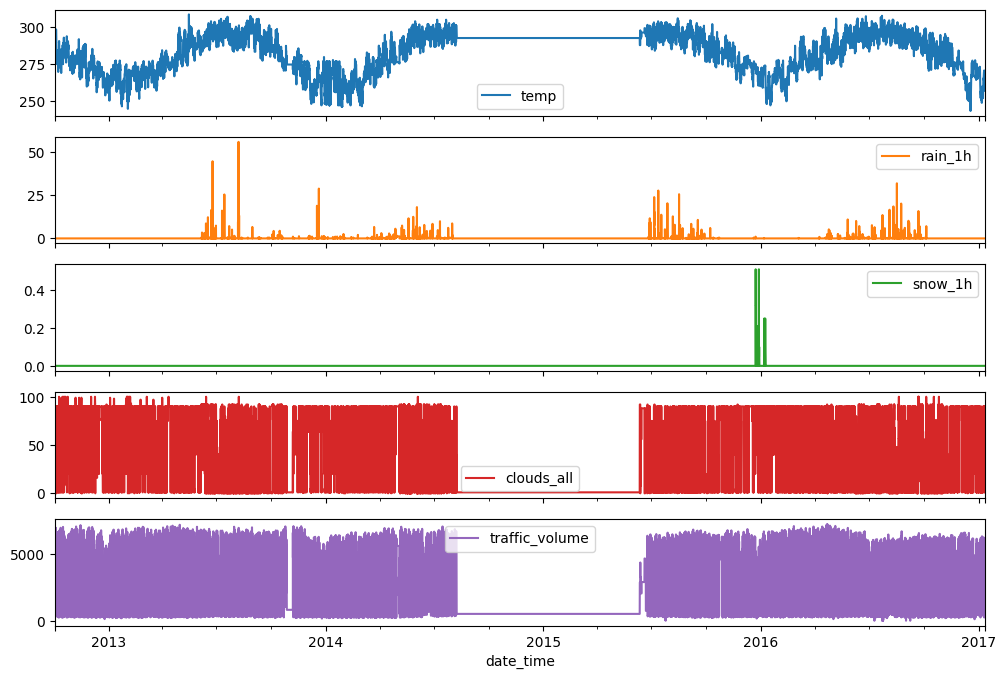

In [ ]:
plot_features = train_df[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

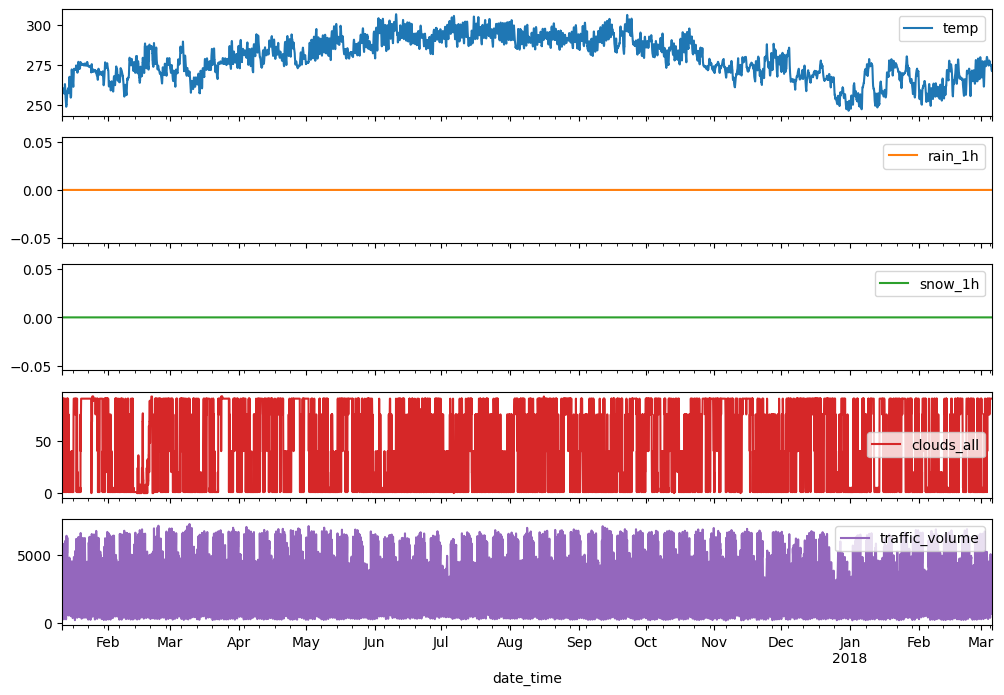

In [ ]:
plot_features = val_df[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

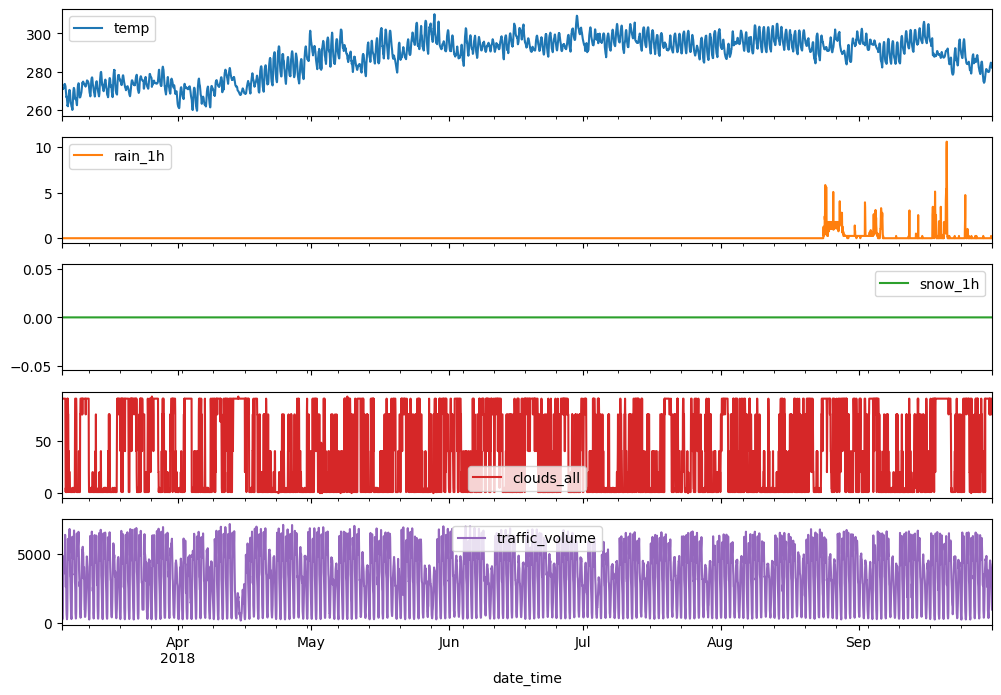

In [ ]:
plot_features = test_df[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

Normalize the data
It is important to scale features before training a neural network. I tested the results using both MinMaxScaler and StandardScaler. I got better results with the MinMaxScaler, So I'll be using scikit-learn MinMaxScaler.

In [ ]:
# Use `float` instead of `np.float`
train_volume = train_df.traffic_volume[0]
scaled_volume = scaled_train_df.traffic_volume[0]
denormalized_volume = float(my_scaler_tv.inverse_transform(scaled_train_df[['traffic_volume']])[0])

train_volume, scaled_volume, denormalized_volume

(5545.0, 0.7637741046831955, 5545.0)

In [ ]:
# Single value denormalization
denormalized_value = float(my_scaler_tv.inverse_transform(np.array([[0.7]])))
denormalized_value

5082.0

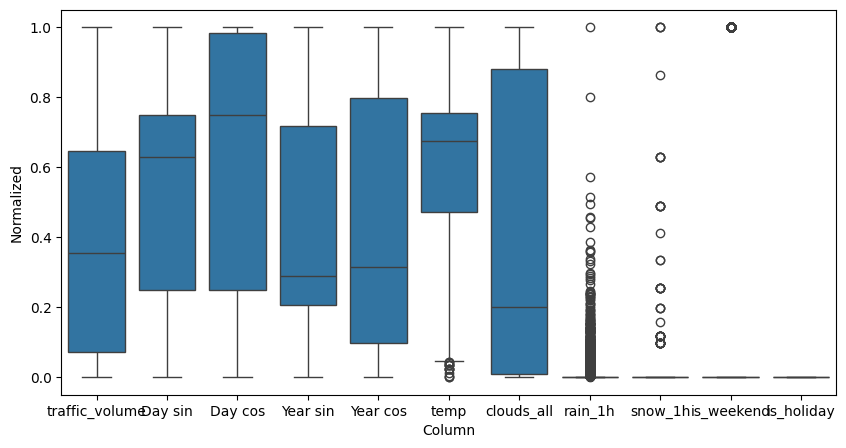

In [ ]:
df_scaled = scaled_train_df.iloc[:,:11].melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x='Column', y='Normalized', data=df_scaled)

The data is showing rain and snow having alot of outliers. I'm unaware if this is corrupt data or if that's the actual weather in that area.

In [ ]:
# Utility functions
# Special Characters for Output Formating
StartBold = "\033[1m"
EndBold = "\033[0m"

WindowGenerator
I modified the WindowGenerator class to have all the required methods and properties consolidated from the beginging in contrast to the original design of adding the methods and properties at subsequent steps.

In [ ]:
'''
[Code Provided by the tutorial]
The WindowGenerator class.
Start by creating the `WindowGenerator` class. The `__init__` method includes
all the necessary logic for the input and label indices.
It also takes the train, eval, and test dataframes as input.
These will be converted to `tf.data.Dataset`s of windows later.

This class can:

1 - Handle the indexes and offsets as shown in the diagrams above.
2 - Split windows of features into a (features, labels) pairs.
3 - Plot the content of the resulting windows.
4 - Efficiently generate batches of these windows from the training, evaluation, and test data, using tf.data.Datasets.
'''
class WindowGenerator():
  def __init__(self, input_width, label_width, shift, batch_size=32,
               train_df=scaled_train_df, val_df=scaled_val_df, test_df=scaled_test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df
    self.example = None

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    self.batch_size = batch_size

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size} = {self.input_width}+({self.shift-self.label_width}+{self.label_width})',
        f'Batch size: {self.batch_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices} start: [{self.label_start}]',
        f'Label column name(s): {self.label_columns}'])

  def split_window(self, features):
    '''
      Given a list consecutive inputs, the split_window method will convert
      them to a window of inputs and a window of labels.
    '''
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='traffic_volume', max_subplots=3):
    '''
      The plot method that allows a simple visualization of the split window
    '''
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
      plt.subplot(max_n, 1, n+1)
      plt.ylabel(f'{plot_col} [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [h]')
    # Maskar: Added this line show that we are only showing n slices
    plt.suptitle(f'Showing only {max_n} slices')

  def make_dataset(self, data):
    '''
      Make_dataset method will take a time series DataFrame and convert it to
      a tf.data.Dataset of (input_window, label_window) pairs using the
      preprocessing.timeseries_dataset_from_array function.
    '''
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False, # Maskar: I changed this to False
        batch_size=self.batch_size, # 32,
        )

    ds = ds.map(self.split_window)

    return ds

  # The WindowGenerator object holds training, validation and test data.
  # Add properties for accessing them as tf.data.Datasets using the above make_dataset method.
  # Also add a standard example batch for easy access and plotting:
  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)

  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.train))
      # And cache it for next time
      self._example = result
    return result

  @example.setter
  def example(self, var):
    self._example = var

plotting

In [ ]:
def plot_train_validation(history, validation_data, metric='mean_absolute_error'):
    '''
    Function to plot the training and validation accuracy progress with epochs for a single model
    '''
    plt.plot(history.history[metric], label='train')  # For TF2
    plt.plot(history.history['val_'+metric], label='valid.')  # For TF2
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    #plt.xticks(range(1,len(history.history['loss'])+1,2))
    #plt.ylim([0.5, 1])
    plt.title(f'{len(history.history[metric])} epochs')
    plt.grid(color='lightgrey', linestyle=':', linewidth=0.5)
    plt.legend(loc='upper right')
    plt.show()

    # Evaluate the learned model with validation set
    print(f'\n\n{StartBold}Validation Scores:{EndBold}\n')
    _ = history.model.evaluate(validation_data, verbose=2)

In [ ]:
class TrainingPlot(Callback):
    '''
      A keras callback helper function to plot
      the taining/validation plot after each epoch
    '''
    def __init__(self, loss_metric='mean_absolute_error'):
      super().__init__()
      self.loss_metric = loss_metric

    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and metrics
        self.losses = []
        self.val_losses = []
        self.logs = []

    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        loss = logs.get(self.loss_metric)
        val_loss = logs.get('val_'+self.loss_metric)

        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.losses.append(loss)
        self.val_losses.append(val_loss)

        # Plots every n-th epoch
        if epoch > 0 and epoch%1==0:

            # Clear the previous plot
            IPython.display.clear_output(wait=True)
            #clear_output(wait=True)
            N = np.arange(0, len(self.losses))

            # You can chose the style of your preference
            #plt.style.use("seaborn")
            #plt.figure(figsize=(10,3))
            plt.xlabel('Epoch')
            plt.ylabel(self.loss_metric)
            plt.plot(N, self.losses, label='train')
            plt.plot(N, self.val_losses, label='valid.')
            plt.grid(color='lightgrey', linestyle=':', linewidth=0.5)
            val_denorm = np.float(my_scaler_tv.inverse_transform(np.array([[val_loss]])))
            plt.title(f'Last validation value = {val_denorm:.2f}')
            plt.legend(loc='upper right')
            plt.show()

Compile and fit

In [ ]:
def compile_and_fit(model, window, patience=5, max_epochs=30,
                    model_label='model', log_dict=None):
    plot_metrics = TrainingPlot()

    rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, min_delta=0.001, patience=patience, mode='min', verbose=1 )

    #mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, mode='min', restore_best_weights=True )

    model.compile( optimizer=tf.optimizers.Adam(), loss=tf.losses.MeanSquaredError(), metrics=[tf.metrics.MeanAbsoluteError()] )

    history = model.fit( window.train, epochs=max_epochs, validation_data=window.val, callbacks=[plot_metrics, early_stopping, rlr] )

    if log_dict:
        log_dict['my_models'][model_label] = model

        IPython.display.clear_output()

        print(f'\n\n{StartBold}Training vs. Validation:{EndBold}\n')
        plot_train_validation(history, window.val)

        log_dict['multi_val_performance'][model_label] = model.evaluate(window.val, verbose=0)
        log_dict['multi_performance'][model_label] = model.evaluate(window.train, verbose=0)


    predictions = model.predict(window.val)
    evaluate_predictions(val_df.traffic_volume, predictions)
    return history


Evaluate predictions

In [ ]:
def evaluate_predictions(y_true, y_pred, plot_start_index=-500):
    print(f'\n\n{StartBold}Predictions Evaluation:{EndBold}\n')
    y_p = np.asarray(my_scaler_tv.inverse_transform(y_pred.reshape(-1,1))).ravel()
    n_predictions = len(y_p)
    y = np.asarray(y_true[-n_predictions:]).ravel()
    print('Predictions:', n_predictions)
    mae = np.float(tf.metrics.mean_absolute_error(y, y_p))
    mae_scaled = np.float(my_scaler_tv.transform(np.array([[mae]])))
    print(f'MAE: {mae:.2f} ({mae_scaled:.4f})')

    plt.subplots(figsize=(15,2))
    plt.plot(y[plot_start_index:], marker='.', label='true')
    plt.plot(y_p[plot_start_index:], marker='.', label='predicted')
    plt.legend()
    plt.show()

The models
The required window

Total window size: 8 = 6+(1+1)
Batch size: 32
Input indices: [0 1 2 3 4 5]
Label indices: [7] start: [7]
Label column name(s): ['traffic_volume']

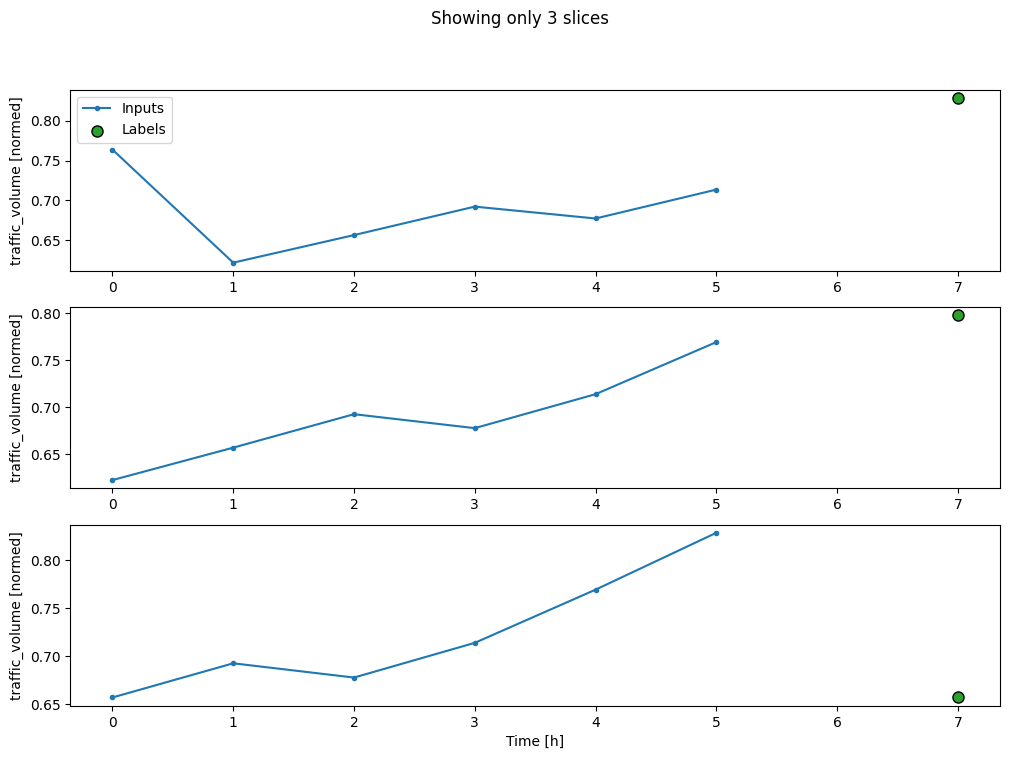

In [ ]:
INPUT_WIDTH = 6
OUT_STEPS = 1
SHIFT = 2
base_window = WindowGenerator(input_width=INPUT_WIDTH,
                               label_width=OUT_STEPS,
                               shift=SHIFT, label_columns=['traffic_volume'],
                               batch_size=32
                               )

base_window.plot()
base_window

Baseline Models

In [ ]:
multi_val_performance = {}
multi_performance = {}
my_models = {}

my_log = {
    'multi_val_performance':multi_val_performance,
    'multi_performance':multi_performance,
    'my_models':my_models
    }

I set all the models to converge into a single output value, which is the traffic volume at the 8th day based on 6 days input of the full features.

Dense
Using only layers.Dense between the input and output gives a decent linear model.

In [ ]:
import tensorflow as tf

def compile_and_fit(model, window, model_label='model', log_dict=None, patience=5, max_epochs=20):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=patience,
                                                      mode='min',
                                                      restore_best_weights=True)

    model.compile(loss=tf.losses.MeanSquaredError(),
                  optimizer=tf.optimizers.Adam(),
                  metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=max_epochs,
                        validation_data=window.val,
                        callbacks=[early_stopping])

    if log_dict is not None:
        log_dict[model_label] = history

    return history

In [ ]:


import tensorflow as tf
from tensorflow.keras.layers import Lambda, Dense

# Define the compile_and_fit function
def compile_and_fit(model, window, model_label='model', log_dict=None, patience=5, max_epochs=20):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=patience,
                                                      mode='min',
                                                      restore_best_weights=True)

    model.compile(loss=tf.losses.MeanSquaredError(),
                  optimizer=tf.optimizers.Adam(),
                  metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=max_epochs,
                        validation_data=window.val,
                        callbacks=[early_stopping])

    if log_dict is not None:
        log_dict[model_label] = history

    return history

# Define your model and window
model_label = 'Dense'
current_window = base_window

dense_model = tf.keras.Sequential([
    Lambda(lambda x: x[:, -1:, :]),  # A single timestep model
    Dense(512, activation='relu'),
    Dense(OUT_STEPS)
])

# Compile and fit the model
history = compile_and_fit(dense_model, current_window, model_label=model_label, log_dict=my_log)

Epoch 1/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0260 - mean_absolute_error: 0.1091 - val_loss: 0.0158 - val_mean_absolute_error: 0.1030
Epoch 2/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0795 - val_loss: 0.0109 - val_mean_absolute_error: 0.0826
Epoch 3/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.0106 - mean_absolute_error: 0.0698 - val_loss: 0.0087 - val_mean_absolute_error: 0.0719
Epoch 4/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0656 - val_loss: 0.0077 - val_mean_absolute_error: 0.0670
Epoch 5/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0625 - val_loss: 0.0072 - val_mean_absolute_error: 0.0650
Epoch 6/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0085 - mean_absolute_error: 0.0599 - val_loss: 0.0072 - val_mean_absolute_error: 0.0648
Epoch 7/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0081 - mean_absolut

In [ ]:
%%time
model_label = 'Dense'
current_window = base_window

dense_model = tf.keras.Sequential([
    Lambda(lambda x: x[:, -1:, :]),
    Dense(512, activation='relu'),
    Dense(OUT_STEPS)
])

history = compile_and_fit(dense_model, current_window,
                          model_label=model_label, log_dict=my_log)

Epoch 1/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 0.0226 - mean_absolute_error: 0.1042 - val_loss: 0.0160 - val_mean_absolute_error: 0.1017
Epoch 2/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0131 - mean_absolute_error: 0.0797 - val_loss: 0.0126 - val_mean_absolute_error: 0.0882
Epoch 3/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0703 - val_loss: 0.0109 - val_mean_absolute_error: 0.0820
Epoch 4/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0665 - val_loss: 0.0101 - val_mean_absolute_error: 0.0792
Epoch 5/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0625 - val_loss: 0.0100 - val_mean_absolute_error: 0.0787
Epoch 6/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0601 - val_loss: 0.0093 - val_mean_absolute_error: 0.0754
Epoch 7/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0081 - mean_absolute_

CNN
A convolutional model makes predictions based on a fixed-width history, which may lead to better performance than the dense model since it can see how things are changing over time:

In [ ]:
%%time
model_label = 'Conv'
current_window = base_window

CONV_WIDTH = 3
conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    Dense(512, activation='relu'),
    Dense(OUT_STEPS)
])

history = compile_and_fit(conv_model, current_window,
                          model_label=model_label, log_dict=my_log)

Epoch 1/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - loss: 0.0255 - mean_absolute_error: 0.1081 - val_loss: 0.0152 - val_mean_absolute_error: 0.0874
Epoch 2/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - loss: 0.0118 - mean_absolute_error: 0.0702 - val_loss: 0.0153 - val_mean_absolute_error: 0.0886
Epoch 3/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - loss: 0.0102 - mean_absolute_error: 0.0633 - val_loss: 0.0126 - val_mean_absolute_error: 0.0806
Epoch 4/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - loss: 0.0090 - mean_absolute_error: 0.0588 - val_loss: 0.0105 - val_mean_absolute_error: 0.0728
Epoch 5/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - loss: 0.0085 - mean_absolute_error: 0.0567 - val_loss: 0.0101 - val_mean_absolute_error: 0.0699
Epoch 6/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - loss: 0.0080 - mean_absolute_error: 0.0545 - val_loss: 0.0095 - val_mean_absolute_error: 0.0666
Epoch 7/20
 882/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0078 - mean